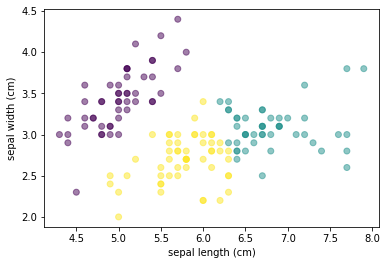

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
# sklearn 라이브러리의 cluster 모듈에는 k-means를 구현할 수 있는 kmeans를 제공
from sklearn.cluster import KMeans

iris = datasets.load_iris()
samples = iris.data[: , 0:2]
# 3개의 그룹으로 나누는 k-menas 모델을 생성
model = KMeans(n_clusters = 3)
# .fit 메서드를 통해 k-means 클러스터링을 수행
model.fit(samples)
# k-learn를 수행한 다음 , predict()메서드를 통해 unlabeled 데이터를 그룹에 할당
labels = model.predict(samples)
# 클러스터링 결과를 시각화합니다.
x = samples[: , 0]
y = samples[: , 1]
plt.scatter(x , y , c = labels , alpha = 0.5)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

In [5]:
import numpy as np
target = iris.target
# 문자열 배열을 생성시킴
species = np.chararray(target.shape , itemsize = 150)
for i in range(len(samples)):
    if target[i] == 0:
        species[i] = "setosa"
    elif target[i] == 1:
        species[i] = "versicolor"
    elif target[i] == 2:
        species[i] = "virginica"
        
import pandas as pd
df = pd.DataFrame({"labels" : labels , "species" : species})
ct = pd.crosstab(df["labels"] , df["species"])
print(ct)

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0               50              0             0
1                0             12            35
2                0             38            15


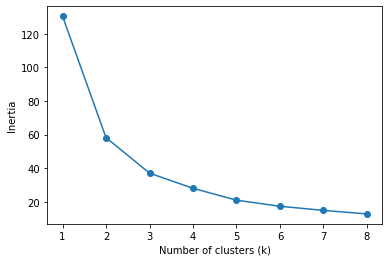

In [6]:
num_clusters = list(range(1, 9))
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다.
for i in num_clusters:
    model = KMeans(n_clusters = i)
    model.fit(samples)
    inertias.append(model.inertia_)
plt.plot(num_clusters , inertias , "-o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()
    
# inertia 기준점과 객체들 사이에 거리를 구해줌
    

In [51]:
import pandas as pd

url = "https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC"
url

'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC'

In [54]:
table = pd.read_html(url) # 웹페이지의 table을 모두 가져와서 table변수로
len(table) # 총 table은 11개 이 중 의미있는 table은 3개 

# table이란 표를 말하는것 같음

11

In [57]:
table[1]

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률(%),조사망률(%),자연증가율(%),합계출산율(%)
0,1925,12997611,558897,359042,199855,43.0,27.6,15.4,6.59
1,1926,13052741,511667,337948,173719,39.2,25.9,13.3,NaN
2,1927,13037169,534524,353818,180706,41.0,27.1,13.9,NaN
3,1928,13105131,566142,357701,208441,43.2,27.3,15.9,NaN
4,1929,13124279,566969,414366,152603,43.2,31.6,11.6,NaN
...,...,...,...,...,...,...,...,...,...
91,2016,51245707,406243,280827,125416,7.9,5.5,2.4,1.17
92,2017,51446201,357771,285534,72237,7.0,5.5,1.5,1.05
93,2018,51635256,326822,298820,28002,6.4,5.8,0.6,0.98
94,2019,51709098,303054,295132,7922,5.9,5.7,0.2,0.92


In [60]:
df = table[1]
df.shape
df.head()
df.tail()

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률(%),조사망률(%),자연증가율(%),합계출산율(%)
91,2016,51245707,406243,280827,125416,7.9,5.5,2.4,1.17
92,2017,51446201,357771,285534,72237,7.0,5.5,1.5,1.05
93,2018,51635256,326822,298820,28002,6.4,5.8,0.6,0.98
94,2019,51709098,303054,295132,7922,5.9,5.7,0.2,0.92
95,2020,51829023,272400,305100,-32000,5.3,5.9,-0.6,0.84


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도 (년)    96 non-null     int64  
 1   추계인구(명)   96 non-null     int64  
 2   출생자수(명)   96 non-null     int64  
 3   사망자수(명)   96 non-null     int64  
 4   자연증가수(명)  96 non-null     int64  
 5   조출생률(%)   96 non-null     float64
 6   조사망률(%)   96 non-null     float64
 7   자연증가율(%)  96 non-null     float64
 8   합계출산율(%)  68 non-null     float64
dtypes: float64(4), int64(5)
memory usage: 6.9 KB


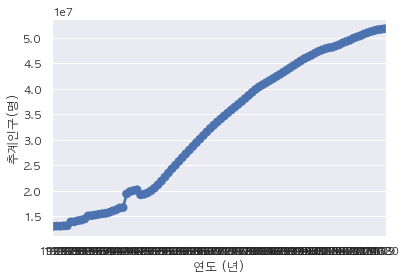

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt 

df.info()

sns.pointplot(data = df , x = "연도 (년)" , y = "추계인구(명)")
sns.set(font = "AppleGothic")

<AxesSubplot:xlabel='연도 (년)', ylabel='추계인구(명)'>

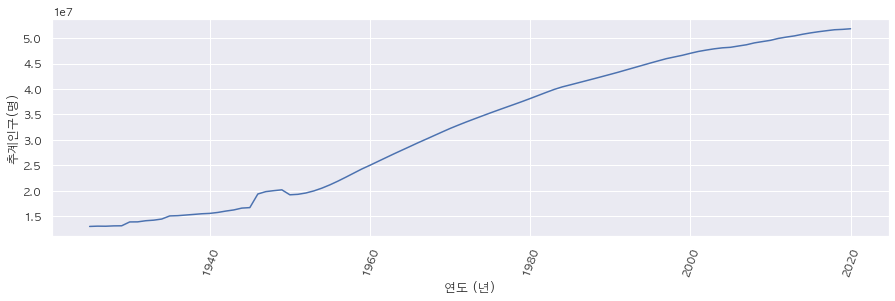

In [79]:
plt.figure(figsize = (15 , 4))
plt.xticks(rotation = 70)
sns.lineplot(data = df , x = "연도 (년)" , y = "추계인구(명)")

<AxesSubplot:xlabel='연도 (년)', ylabel='출생자수(명)'>

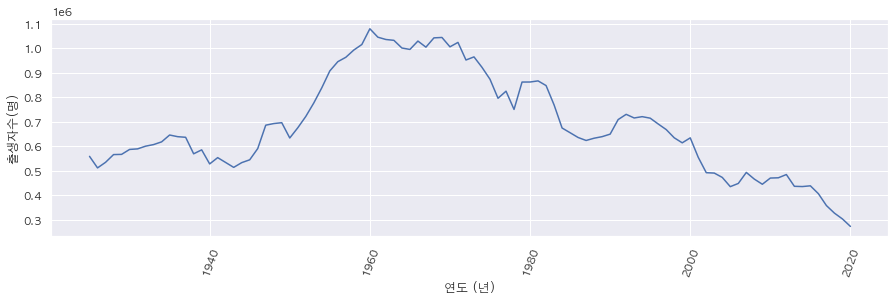

In [82]:
plt.figure(figsize = (15 , 4))
plt.xticks(rotation = 70)
sns.lineplot(data = df , x = "연도 (년)" , y = "출생자수(명)")

<AxesSubplot:xlabel='연도 (년)', ylabel='출생자수(명)'>

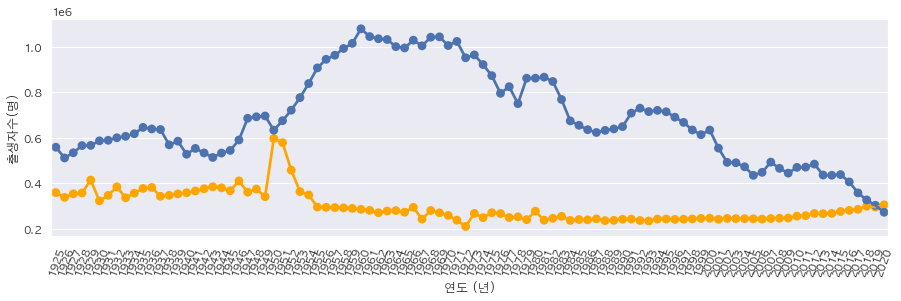

In [90]:
plt.figure(figsize = (15 , 4))
plt.xticks(rotation = 70)
sns.pointplot(data = df , x = "연도 (년)" , y = "사망자수(명)" , color = "orange")
sns.pointplot(data = df , x = "연도 (년)" , y = "출생자수(명)")

<AxesSubplot:>

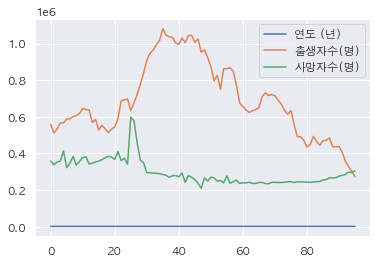

In [92]:
df.columns

df[["연도 (년)" , "출생자수(명)" , "사망자수(명)"]]
df[["연도 (년)" , "출생자수(명)" , "사망자수(명)"]].plot()

In [93]:
df_pop = df[["연도 (년)" , "출생자수(명)" , "사망자수(명)"]]
df_pop = df_pop.set_index("연도 (년)")
df_pop.head()

,출생자수(명),사망자수(명)
연도 (년),,
1925,558897,359042
1926,511667,337948
1927,534524,353818
1928,566142,357701
1929,566969,414366


<AxesSubplot:xlabel='연도 (년)'>

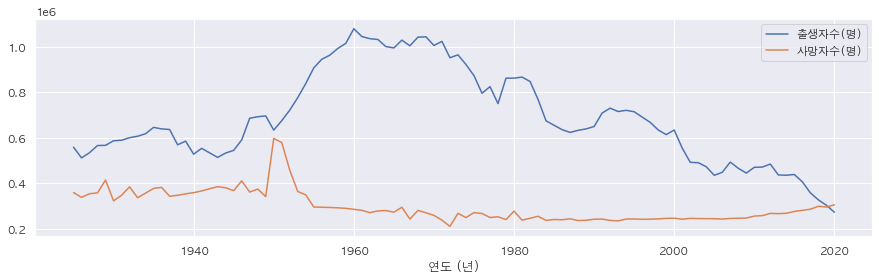

In [94]:
df_pop.plot(figsize = (15 , 4))

<AxesSubplot:xlabel='연도 (년)'>

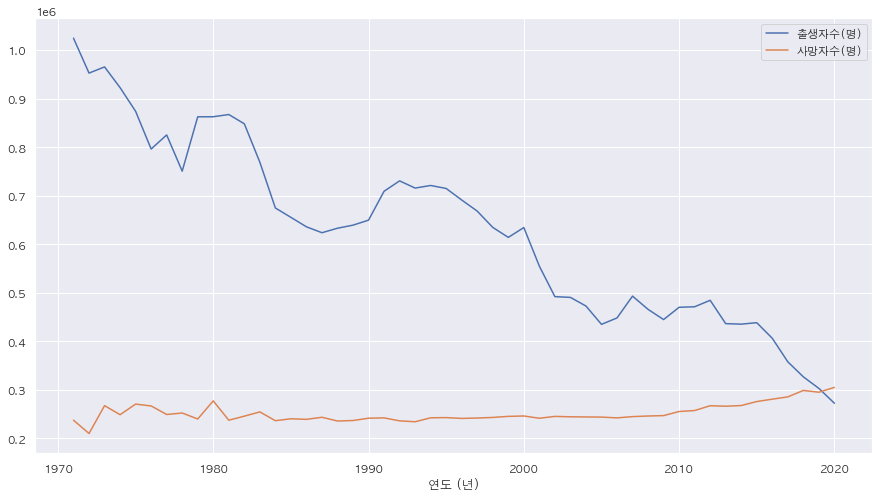

In [95]:
df_pop[-50:].plot(figsize = (15, 8))

<AxesSubplot:xlabel='연도 (년)', ylabel='출생자수(명)'>

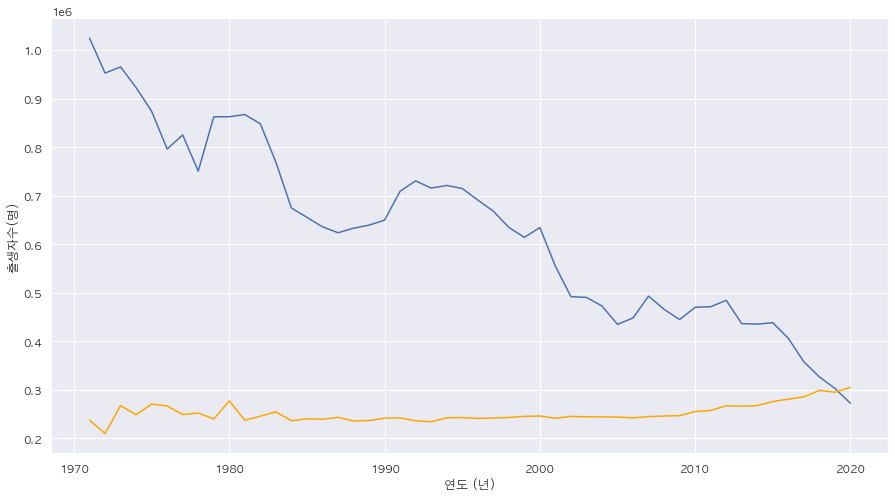

In [103]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = df[-50:] , x = "연도 (년)" , y = "출생자수(명)")
sns.lineplot(data = df[-50:] , x = "연도 (년)" , y = "사망자수(명)" , color = "orange")

<AxesSubplot:xlabel='연도 (년)', ylabel='사망자수(명)'>

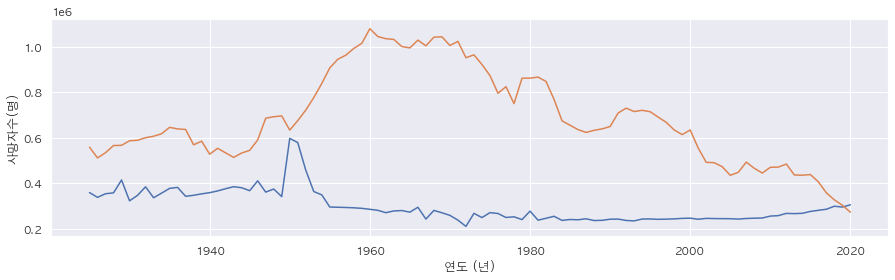

In [112]:
plt.figure(figsize = (15 , 4))
sns.lineplot(data = df , x = "연도 (년)" , y = "사망자수(명)" , palette = "Greens")
sns.lineplot(data = df , x = "연도 (년)" , y = "출생자수(명)" , palette = "Blues")

<AxesSubplot:xlabel='연도 (년)', ylabel='출생자수(명)'>

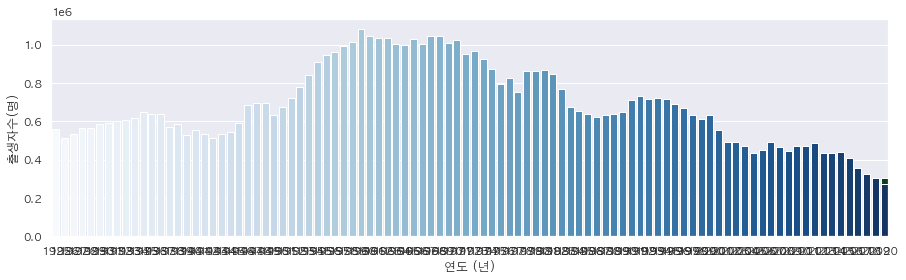

In [113]:
plt.figure(figsize = (15 , 4))
sns.barplot(data = df , x = "연도 (년)" , y = "사망자수(명)" , palette = "Greens")
sns.barplot(data = df , x = "연도 (년)" , y = "출생자수(명)" , palette = "Blues")

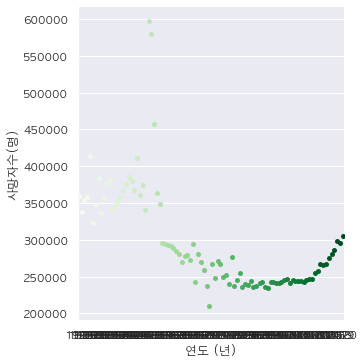

In [117]:
# plt.figure(figsize = (15 , 4))
sns.catplot(data = df , x = "연도 (년)" , y = "사망자수(명)" , palette = "Greens")
# sns.boxplot(data = df , x = "연도 (년)" , y = "출생자수(명)" , palette = "Blues")